In [77]:
from collections import defaultdict
from collections import OrderedDict
import json

descriptors = ['nlay-3_rc-t_nbf-16_ws-t_symws-f_ircws-t_str-20','nlay-3_rc-f_nbf-32_ws-f_str-20','nlay-3_rc-f_nbf-16_ws-f_str-20']
descrip_simple = ['16 filt, rc layers', '32 filt, normal layers','16 filt, normal layers']
prefixes = [10,20,40,60,80]
descriptors_to_prefix_to_perf = defaultdict(lambda: defaultdict(list))
db_records = json.loads(open('chr1_Ctcf/different_data_subsets/runs_perf-metric-auROC.db').read())['records']
db_records += json.loads(open('chr1_Ctcf/runs_perf-metric-auROC.db').read())['records']
for prefix in prefixes:
    for record in db_records:
        message = record['message']
        for descriptor in descriptors:
            passes=False
            if (prefix==100):
                if ('chr1x2' in message and descriptor in message):
                    passes=True
            else:
                if (str(int(prefix))+"pc/ " in message and descriptor in message):
                    print(message, record['best_valid_perf_info']['valid_all_stats']['mean_auROC'])
                    passes=True
            if (passes):
                descriptors_to_prefix_to_perf[descriptor][prefix].append(record)
    #for descriptor in descriptors_to_prefix_to_perf:
    #    print(len(descriptors_to_prefix_to_perf[descriptor][prefix]), )

(u'chr1Ctcf-10pc/ nlay-3_rc-t_nbf-16_ws-t_symws-f_ircws-t_str-20 seed-0', 0.9394987450868131)
(u'chr1Ctcf-10pc/ nlay-3_rc-t_nbf-16_ws-t_symws-f_ircws-t_str-20 seed-2', 0.9354487202103898)
(u'chr1Ctcf-10pc/ nlay-3_rc-t_nbf-16_ws-t_symws-f_ircws-t_str-20 seed-5', 0.9331125902313635)
(u'chr1Ctcf-10pc/ nlay-3_rc-t_nbf-16_ws-t_symws-f_ircws-t_str-20 seed-6', 0.9325263452315757)
(u'chr1Ctcf-10pc/ nlay-3_rc-t_nbf-16_ws-t_symws-f_ircws-t_str-20 seed-7', 0.9298798155467006)
(u'chr1Ctcf-10pc/ nlay-3_rc-f_nbf-32_ws-f_str-20 seed-7', 0.9252782967495135)
(u'chr1Ctcf-10pc/ nlay-3_rc-f_nbf-32_ws-f_str-20 seed-2', 0.9212344078870435)
(u'chr1Ctcf-10pc/ nlay-3_rc-f_nbf-32_ws-f_str-20 seed-6', 0.9187828343121652)
(u'chr1Ctcf-10pc/ nlay-3_rc-f_nbf-32_ws-f_str-20 seed-0', 0.9185450441047636)
(u'chr1Ctcf-10pc/ nlay-3_rc-f_nbf-32_ws-f_str-20 seed-1', 0.917122295202766)
(u'chr1Ctcf-10pc/ nlay-3_rc-f_nbf-32_ws-f_str-20 seed-5', 0.9092845403797116)
(u'chr1Ctcf-10pc/ nlay-3_rc-t_nbf-16_ws-t_symws-f_ircws-t_str-2

In [78]:
auroc_per_group = OrderedDict([(key, [list(set([y['best_valid_perf_info']['valid_all_stats']['mean_auROC'] for y in
                                      descriptors_to_prefix_to_perf[key][x]])) for x in prefixes]) for key in descriptors])
auprc_per_group = OrderedDict([(key, [list(set([y['best_valid_perf_info']['valid_all_stats']['mean_auPRC'] for y in
                                      descriptors_to_prefix_to_perf[key][x]])) for x in prefixes]) for key in descriptors])

In [79]:
auroc_per_group

OrderedDict([('nlay-3_rc-t_nbf-16_ws-t_symws-f_ircws-t_str-20',
              [[0.9298798155467006,
                0.9331125902313635,
                0.9394987450868131,
                0.9325263452315757,
                0.9081195433971749,
                0.9354487202103898],
               [0.9465828125293156,
                0.9456677794485305,
                0.9411932289400693,
                0.9456255353524674,
                0.9465354354215801,
                0.9446592311550916],
               [0.9558090568431286,
                0.956425883579126,
                0.9564917473955669,
                0.9612418088638734,
                0.9531264584095664,
                0.9545957584174213],
               [0.9602951713778862,
                0.9616728441773811,
                0.9633805047272678,
                0.9584808582521385,
                0.9624152428655958,
                0.9610520447656831],
               [0.9646299505685076,
                0.962890705280130

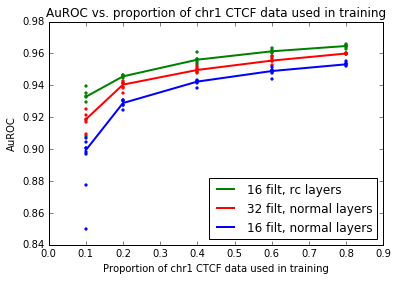

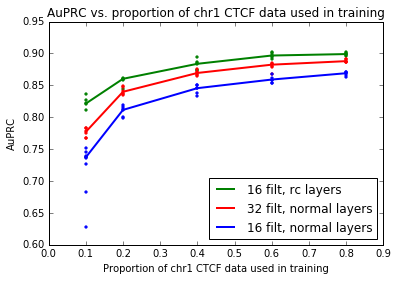

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
for group,groupname in [(auroc_per_group, 'AuROC'), (auprc_per_group, 'AuPRC')]:
    handles = []
    for key,color in zip(group.keys(), ['g','r','b']):
        medians = np.array([np.median(x) for x in group[key]])
        mins = np.abs(np.array([np.min(x) for x in group[key]]) - medians)
        maxs = np.array([np.max(x) for x in group[key]]) - medians
        handles.append(plt.errorbar(np.array(prefixes)/100.0, medians, 
                                    linewidth=2, color=color))
        for idx,xpoint in enumerate(np.array(prefixes)/100.0):
            plt.scatter([xpoint for y in group[key][idx]],
                        group[key][idx],
                        color=color, s=5)
        
    plt.xlim(0)
    plt.xlabel("Proportion of chr1 CTCF data used in training")
    plt.ylabel(groupname)
    plt.title(groupname+" vs. proportion of chr1 CTCF data used in training")
    plt.legend(handles, labels=descrip_simple, loc=4)
    plt.show()
